Error functions
- Fisher information: dots move to the right, high frequencies
- making speed 

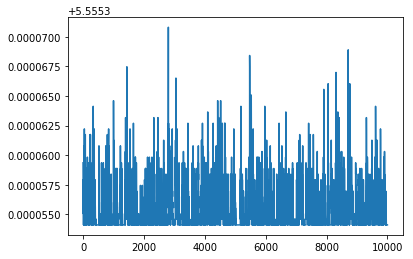

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




n = 400


t = tf.placeholder("float")

w = tf.Variable(tf.random_uniform(
    [n],
    minval=0,
    maxval=2.01,
    dtype=tf.float32
), name="w")


z = tf.Variable(tf.random_uniform(
    [n],
    minval=0,
    maxval= np.pi*2.,
    dtype=tf.float32
), name="z")


# w_bounded = 1. + tf.abs(w)
# vel       = - w_bounded    * tf.sin(w_bounded*t + z)
# vel_      = - w_bounded**2 * tf.cos(w_bounded*t + z)
# speed_sq  =   tf.reduce_sum(vel**2)
# speed_sq_ =   tf.abs(tf.reduce_sum(2*vel*vel_))

# w_bounded = 1. + tf.abs(w)
w_bounded = 1. + w

noise1 = tf.random_normal(shape=[n], mean=0.0, stddev=0.1, dtype=tf.float32)
noise2 = tf.random_normal(shape=[n], mean=0.0, stddev=0.1, dtype=tf.float32)
gamma     =                  tf.cos(w_bounded*t + z)
vel       = - w_bounded    * tf.sin(w_bounded*t + z)

noisy_vel = - w_bounded    * tf.sin((w_bounded + noise2)*t + z + noise1)

vel_      = - w_bounded**2 * tf.cos(w_bounded*t + z)
speed_sq  =   tf.reduce_sum(vel**2)
speed_sq_ =   tf.reduce_sum(2*vel*vel_)

gamma_norm = tf.reduce_sum( (gamma + 1.)**2)
# xxx = tf.reduce_sum( (gamma + 1.)**2)

f_ = tf.exp( tf.cos(w_bounded*t + z) )
f  = f_/tf.reduce_sum(f_)
logf = tf.log(f)
df_ = vel*f_
df  = (f_*tf.reduce_sum(df_) - df_*tf.reduce_sum(f_))/tf.reduce_sum(f_)**2

dlogf = df/f



entropy = - tf.reduce_sum(logf*f)
fisher  = tf.reduce_sum(f*dlogf**2)

error = tf.reduce_sum(tf.abs(vel)) + entropy

# error = - fisher 
# error = entropy
# error = (speed_sq/float(n) - 1.)**2
# error =  tf.abs(speed_sq_)  + 10.*tf.exp( - tf.sqrt(speed_sq))
# 3.*tf.exp( - tf.sqrt(speed_sq))
# error = speed_sq_ + tf.exp( - tf.sqrt(speed_sq)) + (gamma_norm - n/5.)**2
# error = speed_sq_ + tf.exp( - tf.sqrt(speed_sq)) 


# train_op = tf.train.GradientDescentOptimizer(0.001).minimize(error)
train_op = tf.train.AdamOptimizer().minimize(error)
# Normal TensorFlow - initialize values, create a session and run the model
model = tf.global_variables_initializer()

w_ = []
z_ = []
session = tf.Session() 
session.run(model)

err = []

for _ in range(1000):
    tt = np.random.sample()*1000.
    for i in range(50):
        t_value = np.random.sample()*10.
        _, e, freq = session.run([train_op, error, w_bounded], feed_dict={t: t_value})
        err.append(e)

        w_.append(freq)
    #     w_.append(w.eval(session)**2 + 1)
        z_.append(z.eval(session))
    
plt.plot(err[-10000:]);


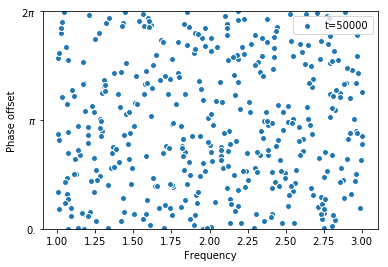

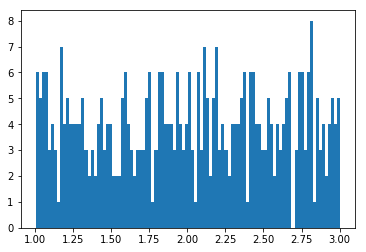

In [30]:
freq = np.array(w_)[0]
off  = np.array(z_)[0]%(np.pi*2)

plt.xlim(np.amin(freq)-0.1, np.amax(freq)+0.1)
plt.xlabel("Frequency")
plt.ylabel("Phase offset")
plt.ylim(0,np.pi*2)
plt.yticks([0.,np.pi, 2*np.pi],["0.","$\pi$","$2\pi$"])


plt.scatter(freq,off, label="t={}".format(len(w_)), edgecolor="white")
# plt.plot([np.amin(freq),np.amax(freq)],[np.amin(freq),np.amax(freq)], c="gray",linestyle=':')

plt.legend()

plt.show()


plt.hist(freq,bins=100)

plt.show()


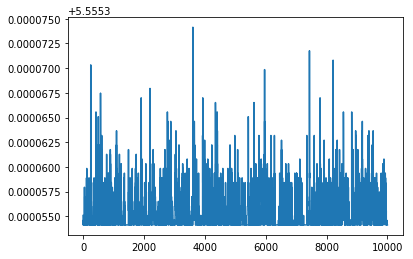

In [31]:
for _ in range(1000):
    tt = np.random.sample()*1000.
    for i in range(50):
        t_value = np.random.sample()*10.
        _, e, freq = session.run([train_op, error, w_bounded], feed_dict={t: t_value})
        err.append(e)

        w_.append(freq)
    #     w_.append(w.eval(session)**2 + 1)
        z_.append(z.eval(session))
    
plt.plot(err[-10000:]);

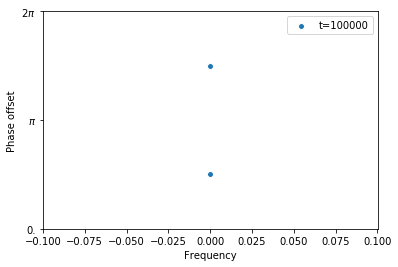

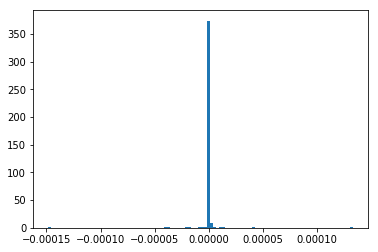

In [32]:
freq = np.array(w_)[-1]
off  = np.array(z_)[-1]%(np.pi*2)

off  = off + np.pi/2.
off = off%(np.pi*2)


plt.xlim(np.amin(freq) - 0.1, np.amax(freq)+0.1)
plt.ylim(0,np.pi*2)
plt.xlabel("Frequency")
plt.ylabel("Phase offset")
plt.yticks([0.,np.pi, 2*np.pi],["0.","$\pi$","$2\pi$"])

plt.scatter(freq,off, label="t={}".format(len(w_)), edgecolor="white", marker="o")
# plt.plot([np.amin(freq),np.amax(freq)],[np.amin(freq),np.amax(freq)], c="gray",linestyle=':')

plt.legend()

plt.show()


plt.hist(freq,bins=100)

plt.show()


(550000, 400)


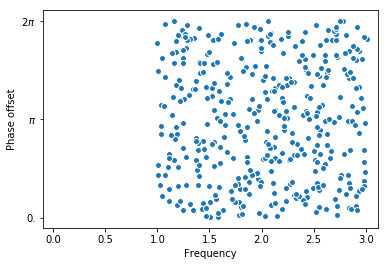

In [18]:
import matplotlib.animation as animation

freq = np.array(w_)
off  = np.array(z_)%(2.*np.pi)

off  = off + np.pi/2.
off = off%(np.pi*2)

ims = []


fig = plt.figure()
sc = plt.scatter(freq[0],off[0], edgecolor="white")

plt.xlim(np.amin(freq)-0.1, np.amax(freq)+0.1)
plt.xlabel("Frequency")
plt.ylabel("Phase offset")
plt.yticks([0.,np.pi, 2*np.pi],["0.","$\pi$","$2\pi$"])


print freq.shape


def update_plot(i, data, scat):
    offsets = np.hstack([
        data[0][[i]].T,
        data[1][[i]].T
        ])
    scat.set_offsets(offsets)
    return scat,



ani = animation.FuncAnimation(fig, update_plot, frames=np.arange(0,len(w_),step=len(w_)//500),
                                  fargs=([freq,off], sc))




ani.save('module_formation_const_speed.mp4')

plt.show()

1.584491234325106e-13


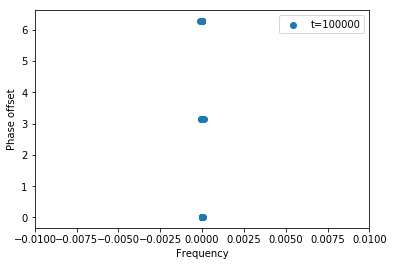

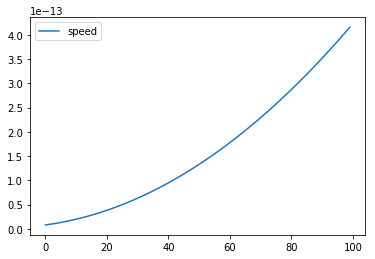

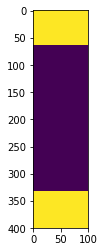

In [33]:

ts = np.linspace(0.,20.,num=100).reshape((-1,1))

# n=5
freq = np.array(w_)[-1]
off  = np.array(z_)[-1]%(np.pi*2)
# freq = np.ones(n)
# freq = np.zeros(n)
# off  = np.linspace(0.,np.pi*2,num=n, endpoint=False)

# freq = np.random.sample(n) + .5
# off  = np.random.sample(n)*np.pi*2

# subset = np.where( (freq > 1.2)  * (freq < 1.4))

# freq = freq[subset]
# off  = off[subset]
score = freq*10.+ off
order = np.argsort(score)
freq = freq[order]
off = off[order]

gamma = np.cos(freq*ts + off)
vel  =  - freq    * np.sin(freq*ts + off)

vel_ =  - freq**2 * np.cos(freq*ts + off)
speed  = np.sum(vel**2, axis=1)
speed_ = np.sum(2*vel*vel_, axis=1)

print np.mean(speed)

plt.xlabel("Frequency")
plt.ylabel("Phase offset")
plt.scatter(freq, off, label="t={}".format(len(w_)))
plt.legend()
plt.show()


plt.plot(speed, label="speed");
# plt.plot(np.sum(gamma + 1, axis=0))
# plt.plot([n/10.]*len(gamma))
plt.legend();
plt.show()

plt.imshow(np.exp(gamma.T))